In [1]:
import pandas as pd 
from clear_txt import *
from data_path import *
from to_chart import *

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ademoguzhanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df=migros_raw_products

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15387 entries, 300 to 2700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 15387 non-null  object 
 1   urunKategorileri       15387 non-null  object 
 2   urunKategorileriTwo    15385 non-null  object 
 3   urunKategorileriThree  14945 non-null  object 
 4   urunKategorileriFour   8745 non-null   object 
 5   urunKategorileriFive   7 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                15385 non-null  object 
 9   urunAciklama           12935 non-null  object 
 10  urunFoto               15387 non-null  object 
 11  urunURL                15385 non-null  object 
 12  Unnamed: 8             0 non-null      float64
dtypes: float64(3), object(10)
memory usage: 1.6+ MB


## Null Marka ve Ürün Adlarını Temizledim


In [4]:
df = df.dropna(subset=['uMarka'])
df = df.dropna(subset=['urunAdi'])

In [5]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15385 entries, 300 to 2700
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   uMarka                 15385 non-null  bool 
 1   urunKategorileri       15385 non-null  bool 
 2   urunKategorileriTwo    15385 non-null  bool 
 3   urunKategorileriThree  15385 non-null  bool 
 4   urunKategorileriFour   15385 non-null  bool 
 5   urunKategorileriFive   15385 non-null  bool 
 6   urunKategorileriSix    15385 non-null  bool 
 7   urunKategorileriSeven  15385 non-null  bool 
 8   urunAdi                15385 non-null  bool 
 9   urunAciklama           15385 non-null  bool 
 10  urunFoto               15385 non-null  bool 
 11  urunURL                15385 non-null  bool 
 12  Unnamed: 8             15385 non-null  bool 
dtypes: bool(13)
memory usage: 315.5 KB


## Unnamed Kolonunu Sildim

In [6]:
del df['Unnamed: 8']

### Unique Kategorilere Bakalım

In [7]:
df.nunique()

uMarka                    1394
urunKategorileri            14
urunKategorileriTwo         88
urunKategorileriThree      421
urunKategorileriFour       563
urunKategorileriFive         3
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15209
urunAciklama             12153
urunFoto                 15077
urunURL                  15219
dtype: int64

#### 10 Ana Kategori Olması Gerekirken 14 Gözüküyor. Temizleyelim  

In [8]:
def unique(list1):
    # intilize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    # print list
    for x in unique_list:
        print (x)

In [9]:
unique(df["urunKategorileri"])


Süt, Kahvaltılık
Kağıt, Kozmetik
Ev, Pet
Bebek, Oyuncak
İçecek
Gıda, Şekerleme
Et, Tavuk, Balık
Elektronik
Deterjan, Temizlik
Meyve, Sebze
Shoulders
Bugün Eklenenler
Guy
Oreal


In [10]:
df[df["urunKategorileri"]=='Elektronik']

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
112,i'think,Elektronik,Telefon Ve Aksesuarları,Telefon Aksesuarları,NaN,NaN,NaN,NaN,i'think Çift Usb Girişli 2.1A Araç İçi Şarj Ci...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/ithink-cift-usb-giri...
4126,Mystyle,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,My Style Dekoratif Led Işık Yıldız/Kalp - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/my-style-dekoratif-l...
4190,Samsung,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar,NaN,NaN,NaN,NaN,Samsung Galaxy Tab A8 T290 Siyah Tablet - Migros,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/samsung-galaxy-tab-a...
4183,Apple,Elektronik,Telefon Ve Aksesuarları,Telefon,NaN,NaN,NaN,NaN,Iphone 12 Mini 64 Gb Kırmızı Cep Telefonu - Mi...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/iphone-12-mini-64-gb...
4177,Rowell,Elektronik,"Isıtma, Soğutma",Isıtıcılar,NaN,NaN,NaN,NaN,Rowell 2000W Elektrikli Fan Isıtıcı Lq-501 - M...,&lt;p&gt;2020-240V 50Hz 2000W soğuk/ılık/sıcak...,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/rowell-2000w-elektri...
4131,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood 16 Dekoratif Led Top Işık Zinciri -...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-16-dekora...
4057,Deerma,Elektronik,Elektrikli Ev Aletleri,Süpürge,NaN,NaN,NaN,NaN,Deerma Vc 20 Plus Dikey Şarjlı Süpürge - Migros,"&lt;p&gt;Deerma VC20 dikey şarjlı süpürge, güç...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/deerma-vc-20-plus-di...
4061,Urban Mood,Elektronik,Elektrikli Ev Aletleri,Kişisel Bakım,Diğer Kişisel Bakım Cihazları,NaN,NaN,NaN,Urban Mood Ultrasonic Şarjlı Yüz Temizleme Cih...,"&lt;p&gt;&lt;span style="";color: rgb(117, 117,...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-ultrasoni...
4127,Urban Mood,Elektronik,"Aydınlatma, Elektrik Malzemeleri",Masa Lambaları,NaN,NaN,NaN,NaN,Urban Mood Dekoratif Led Işık Kavanoz 10'lu - ...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/urban-mood-dekoratif...
4191,Canon,Elektronik,Bilgisayar ve Aksesuarları,Bilgisayar Aksesuarları,NaN,NaN,NaN,NaN,Canon Pixma G3411 Wifi Tarayıcı Renkli Fotokop...,NaN,https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/canon-pixma-g3411-wi...


### Yanlış Eklenen Kategori Az Olduğu İçin Sildim

In [11]:
df.drop(df[df["urunKategorileri"]=='Oreal'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Guy'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Shoulders'].index, inplace = True) 
df.drop(df[df["urunKategorileri"]=='Bugün Eklenenler'].index, inplace = True) 

In [12]:
df.nunique()

uMarka                    1388
urunKategorileri            10
urunKategorileriTwo         87
urunKategorileriThree      420
urunKategorileriFour       558
urunKategorileriFive         1
urunKategorileriSix          0
urunKategorileriSeven        0
urunAdi                  15065
urunAciklama             12033
urunFoto                 14933
urunURL                  15075
dtype: int64

In [13]:
df["uMarka"]=df["uMarka"].str.capitalize()

In [14]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,15235,15235,15235,14795,8628,4,15235,12804,15235,15233
unique,1387,10,87,420,558,1,15065,12033,14933,15075
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,L'Oreal Paris Ral Rougesıg.nu 113 I Dont 28 G ...,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/gliss-bio-tech-hafta...
freq,479,3742,1343,254,205,4,2,98,145,2


### Birebir Aynı Olan Satırları Sildim

In [15]:
df.drop_duplicates(keep = False, inplace = True)

In [16]:
df.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,14919,14919,14919,14479,8506,4,14919,12616,14919,14917
unique,1384,10,87,420,558,1,14907,11951,14775,14917
top,Reyondan,"Kağıt, Kozmetik",Atıştırmalık,Deodorant,Ruj,M&M's,Touch Me Çelik Termos 350 Ml - Migros,"&lt;p&gt;&lt;strong&gt;Bir müşteri, aynı gün i...",https://migros-dali-storage-prod.global.ssl.fa...,https://www.migros.com.tr/acikel-antep-fistikl...
freq,479,3426,1343,254,189,4,2,98,145,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14919 entries, 300 to 2700
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uMarka                 14919 non-null  object 
 1   urunKategorileri       14919 non-null  object 
 2   urunKategorileriTwo    14919 non-null  object 
 3   urunKategorileriThree  14479 non-null  object 
 4   urunKategorileriFour   8506 non-null   object 
 5   urunKategorileriFive   4 non-null      object 
 6   urunKategorileriSix    0 non-null      float64
 7   urunKategorileriSeven  0 non-null      float64
 8   urunAdi                14919 non-null  object 
 9   urunAciklama           12616 non-null  object 
 10  urunFoto               14919 non-null  object 
 11  urunURL                14917 non-null  object 
dtypes: float64(2), object(10)
memory usage: 1.5+ MB


### Ürün Açıklama Kolonunu Düzenleyelim

In [18]:
df["urunAciklama"] = df["urunAciklama"].astype(str).apply(remove_html)

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',10000)


In [20]:
df.head(200)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
300,Algida,"Süt, Kahvaltılık",Dondurma,Kap Dondurma,NaN,NaN,NaN,NaN,Algida Maraş Sade Fıstık 500 Ml - Migros,"Algida Maraş Usulü Sade Fıstık dondurma, habersiz gelen konuklarınıza ikram\nedebileceğiniz lezzetli bir tatlı olmayı başarıyor. Algida’nın taze sütlerden\nve Antep fıstığı ile hazırladığı enfes dondurma, sofralarınıza lezzet katan\nhafif bir tatlı olma özelliği taşıyor. Besleyici bir sütlü gıda olan Algida\nMaraş usulü sade ve Antep fıstıklı dondurmaya derin dondurucunuzda yer\naçabilirsiniz. Kolayca servis edilen sertlikteki kıvamı ve yoğun süt\niçeriği ile ağızda harika bir tat bırakan Algida dondurmayı güvenle\ntüketebilirsiniz. Yoğun kıvamı ve yavaşça eriyen müthiş aroması ile alışkanlık\nyapan Algida Maraş usulü sade ve fıstıklı dondurmayı konuklarınıza ikram\nedeceğiniz tatlıların yanında da servis edebilirsiniz. İşletme\nKayıt No TR-59-K-00059 Net Miktar\n(g/ml) 500 Menşei TÜRKİYE İçindekiler Su,şeker,süt\nkreması,yağsız süt tozu,pastörize yağsız keçi sütü(%2,5),peynir altı suyu\ntozu,(süt ürünü),süt proteini,pastörize yağsız süt,kavrulmuş antep fıstık\nparça,kıvam arttırıcı (guar gam,selüloz gam,emülgatör(yağ asitlerinin mono ve\ndigliseridlrei),sahlep.İz miktarda fındık,diğer fıstık,ceviz badem\nçeşitleri,soya lesitini,buğday proteini,susam yağı ve yumurta\niçerebilir. Alerjen Uyarısı Süt ve süt ürünleri, iz\nmiktarda fındık,diğer fıstık,ceviz badem çeşitleri,soya lesitini,buğday\nproteini,susam yağı ve yumurta içerebil Saklama\nKoşulları -18 °C muhafaza ediniz Gıda İşletmecisi /\nÜretici / İthalatçı / Dağıtıcı UNİLEVER SANAYİ VE TİCARET TÜRK\nA.Ş.(ALGİDA) Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/11578506/11578506-5f4e36.jpg,https://www.migros.com.tr/algida-maras-sade-fistik-500-ml-p-b0ac8a
2102,Sofia,"Kağıt, Kozmetik",Kağıt Ürünleri,Tuvalet Kağıdı,NaN,NaN,NaN,NaN,Sofia Tuvalet Kağıdı 32'Li - Migros,"Doğada Çözünür Özellikli Ambalajı ve Geliştirilen Ürünleri ile\nSofia&;nbsp;Ailesi Yenilendi! Sofia Beyaz Tuvalet Kağıdı, tüy\nyumuşaklığı hissi veren özel dekoratif dokusu ve mikro gofraj teknolojisi\nsayesinde, cildinizde benzersiz bir yumuşaklık hissi yaratır. 3 Katlı dolgun\nrulo yapısı ile ıslandığında elinizde dağılmaz, tuvalete atıldığında ise suyun\niçinde kolayca çözünür.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/31011012/31011012-0c712f.jpg,https://www.migros.com.tr/sofia-tuvalet-kagidi-32li-p-1d930c4
4707,Ünal çiftliği,"Süt, Kahvaltılık",Peynir,Yerli Yöresel Peynir,NaN,NaN,NaN,NaN,Ünal Çiftliği Manyas Peyniri Az Tuzlu Kg - Migros,"Ünal Çiftliği Manyas Peyniri Az Tuzlu kg, bol gözenekli ve\nbesleyici bir peynir çeşididir. Balıkesir yöresine özgü olan bu peynir Mihaliç\npeyniri olarak da bilinmektedir. Meşhur Susurluk tostunun yapımında da Manyas\nPeyniri kullanılmaktadır. Ünal Çiftliği Manyas Peyniri';ni kahvaltının yanı\nsıra hamur işlerinde kullanarak lezzeti tatlar elde\nedebilirsiniz. Muhafaza Koşulu: 0-4 C';de muhafaza\nediniz. Menşei Ülke: Türkiye Üretici Adı: Ünal Çift. Süt. Ür. İm.\nAlican Selen Peyniri keserken, peynir bıçağı kullanılmalıdır\nve bıçağın ıslatılması gerekmektedir. Bu peynirin düzgün kesilmesine yardımcı\nolacaktır. Peynir eğer hemen tüketilmeyecek ise, kendi ambalajında\nsaklanmalıdır. Tüm peynir çeşitleri, ışıksız ortamda, buzdolabında muhafaza\nedilmelidir. Ambalajı açıldıktan sonra ise uygun bir saklama kabında, hava ile\nteması kesilere

### En Çok Ürün Hangi Kategoride Bakalım

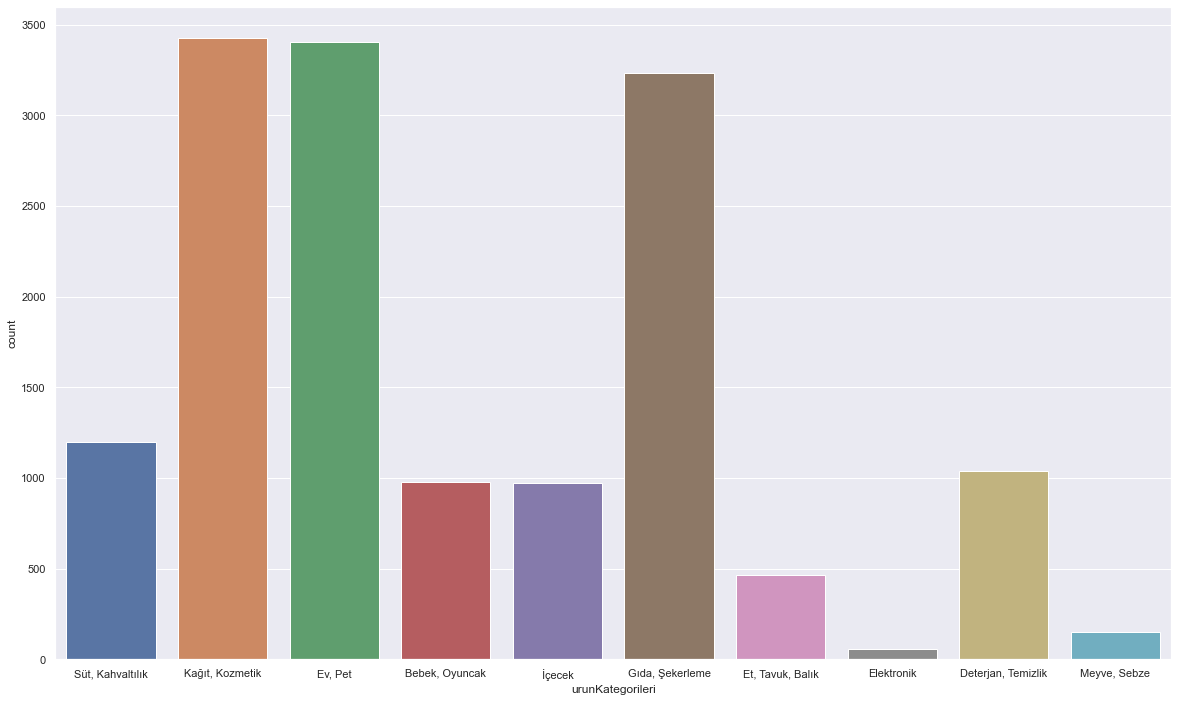

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(20, 12))

ax = sns.countplot(x="urunKategorileri", data=df)

In [22]:
kagitKozmetik=df[df["urunKategorileri"] == "Kağıt, Kozmetik"]

### Top 10 Kağıt Kozmetik Markaları

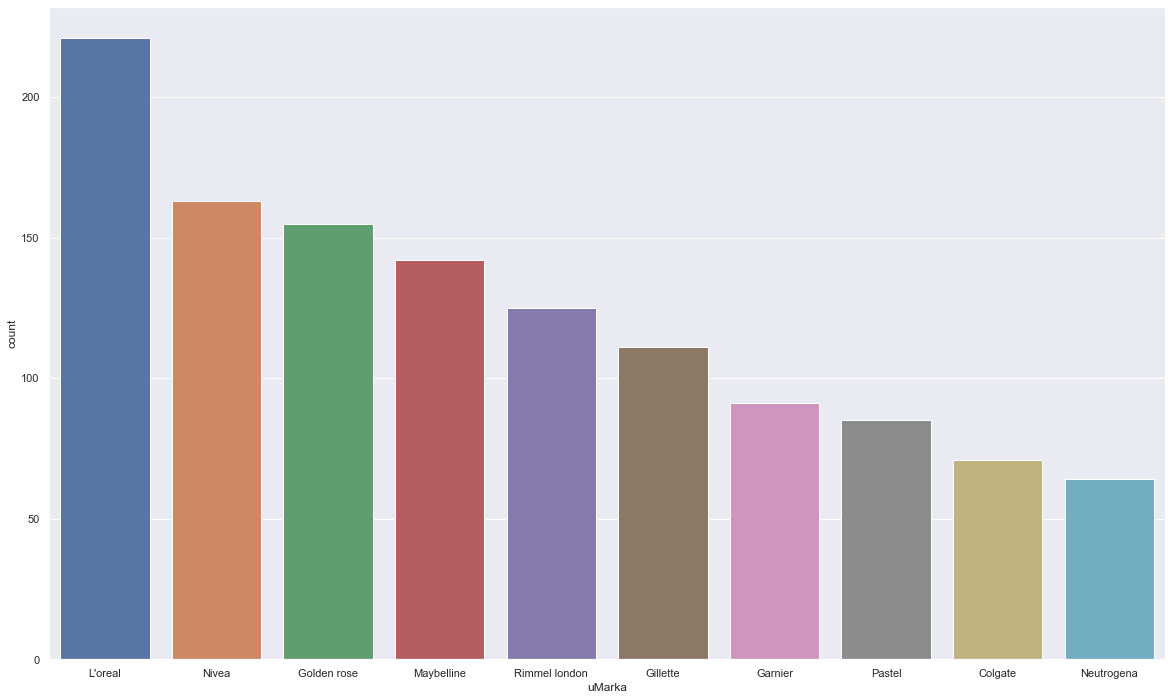

In [23]:
sns.set()
plt.figure(figsize=(20, 12))
sns.countplot(x='uMarka',data=kagitKozmetik,order=pd.value_counts(kagitKozmetik['uMarka']).iloc[:10].index)


### Aynı İsme Sahip Olan Ürünleri Listeleyelim

In [24]:
pd.value_counts(kagitKozmetik['urunAdi']).iloc[:3]

Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros      2
Oral-B Şarjlı Diş Fırçası Yedek Başlığı 3 Boyutlu Beyazlık - Migros    1
Duru Beyaz Sabun800 G - Migros                                         1
Name: urunAdi, dtype: int64

In [25]:
# 1 Tane çıktı. İsimleri aynı açıklamaları farklı.

In [26]:
kagitKozmetik[kagitKozmetik.urunAdi == "Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros"]

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
104,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Saçın Yeniden Yapılandırılmasında Rol Oynayan En Önemli Aminoasitlerden\nBiri Olan Arginine Mikro Sirkülasyonu Hızlandırarak Saçı Kökten Uca Beslemeye\nYardımcı Olur. Saç Dökülmelerinde Gözle Görülür Azalma. Saçlar\ngüçlenerek uzar. Saçı dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Bir müşteri, aynı gün içerisinde, bu\nüründen en fazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri\nMigros Ticaret A.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255782/34255782_etiket-cd0481.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a6
103,L'oreal,"Kağıt, Kozmetik",Saç Bakım,Şampuan,NaN,NaN,NaN,NaN,Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan 450 Ml - Migros,"Elseve Arginine Direnç X3 Dökülme Karşıtı Şampuan Saçlar güçlenerek\nuzar. Saçı koparak dökülmeye karşı korur. Saç kökünü besler,\nenerji verir.&;nbsp; Saçın yeniden yapılandırılmasında rol oynayan en\nönemli aminoasitlerden biri olan Arginine mikro sirkülasyonu hızlandırarak,\nsaçı kökten uca beslemeye yardımcı olur. Saç Dökülmelerinde Gözle\nGörülür Azalma Bir müşteri, aynı gün içerisinde, bu üründen en\nfazla 3 adet sipariş verebilir. 3 adet üzerindeki siparişleri Migros Ticaret\nA.Ş iptal etme hakkını saklı tutar.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/34255777/34255777_urundetay-b75b44.jpg,https://www.migros.com.tr/elseve-arginine-direnc-x3-dokulme-karsiti-sampuan-450-ml-p-20ab3a1


In [27]:
sutKahvalti=df[df["urunKategorileri"] == "Süt, Kahvaltılık"]

In [28]:
yumurta=sutKahvalti[sutKahvalti["urunKategorileriTwo"]=="Yumurta"]

In [29]:
yumurta.describe(include=['O'])

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunAdi,urunAciklama,urunFoto,urunURL
count,24,24,24,0,0,0,24,24,24,24
unique,12,1,1,0,0,0,24,24,24,24
top,Yumurtacım,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,Keskinoğlu Free Range M 10'lu Yumurta - Migros,"Yumurtacım 30';lu L Boy Yumurta, besleyici besinlerin\nbaşında gelen yumurtayı tazelik ve lezzet ile sofralarınıza taşır. Büyük boy\nolması ile iri yumurta sevenlerin gözdesi haline gelir. Yumurta; kahvaltıda\nhaşlanarak omlet ya da menemen şeklinde tüketilebileceği gibi pek çok yemek\ntarifinin de kilit malzemesi olarak mutfaklarda yerini\nalır. Günde zinde bir başlangıç yapmak istediğiniz durumlarda\nkahvaltıda yumurta tüketmeniz uzun süre tok hissetmenize yardımcı\nolur. İşletme Kayıt No TR\n03-0061 Menşei TÜRKİYE İçindekiler YUMURTA Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KUMARTAŞLI GIDA VE\nNAKLİYE TİCARET SAN.LTD.ŞTİ. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001975/20001975-cdebd9.jpg,https://www.migros.com.tr/yumurtacim-15li-l-boy-yumurta-63-72-g-p-13134b7
freq,7,24,24,NaN,NaN,NaN,1,1,1,1


In [30]:
yumurta.head(24)

,uMarka,urunKategorileri,urunKategorileriTwo,urunKategorileriThree,urunKategorileriFour,urunKategorileriFive,urunKategorileriSix,urunKategorileriSeven,urunAdi,urunAciklama,urunFoto,urunURL
1138,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Zarı Tozu Kapsülü 19.5 G - Migros,"İşletme Kayıt\nNo TR-35-K-035184/003901-14,02,2018 Kullanım\nÖnerileri İlaç değildir. Hastalık önlenmesi veya tedavi amacıyla\nkullanılmaz. Takviye edici gıdalar normal beslenmenin yerine geçmez. Tavsiye\nedilen günlük dozajı aşmayınız. Çocukların ulaşamayacağı yerde\nsaklayınız. Menşei TÜRKİYE İçindekiler Yumurta\nkabuğu , YUMURTA ZARI , ZERDEÇAL, ÇÖREKOTU Alerjen\nUyarısı yumurta içerir Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı KOR AGRO ORGANİK GIDA\nİNŞ.ENERJİ SAN.VE TİC.A.Ş. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20002000/20002000-7c03b9.jpg,https://www.migros.com.tr/nova-yumurta-zari-tozu-kapsulu-195-g-p-13134d0
1136,Cp,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Cp 10'lu M Orta Boy D Vitaminli Yumurta (53-62 G) - Migros,"İşletme Kayıt No 030202 Kullanım\nÖnerileri YUMURTLAMA TARİHİNDEN İTİBAREN 18. GÜNE KADAR YUMURTANIN\nSOĞUTULMASI ZORUNLU DEĞİLDİR . 18. GÜNDEN İTİBAREN 5 İLE 8 DERECE ARASINDA\nMUHAFAZA EDİLMELİDİR\n. Menşei TÜRKİYE İçindekiler YUMURTA\nPROTEİN ,YAG, KARBONHİDRAT, MİNERAL Saklama\nKoşulları Serin ve Kuru ortamda muhafaza ediniz Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı C.P.STANDART GIDA\nSAN.VE TİC.A.Ş. Ürün Bilgilerini Kullanma\nHakkında İnternet sitemizde ve online satış kanallarımızda yer\nalan ürün etiket bilgileri, ürünün tedarikçisi tarafından Migros Ticaret\nA.Ş.’ye iletilen en güncel bilgilerdir. Ürün etiket bilgileri ile internet\nsitemiz ve online satış kanallarımızda bulunan bilgiler arasında herhangi bir\nfarklılık bulunması halinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20001998/20001998-efc518.jpg,https://www.migros.com.tr/cp-10lu-m-orta-boy-d-vitaminli-yumurta-53-62-g-p-13134ce
1120,Raya,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Raya Organik M Boy Yumurta 8'li (53 - 62 G) - Migros,"Raya Organik M Boy Yumurta,&;nbsp; doğal ortamda gezen\ntavukların yumurtalarından oluşur.&;nbsp;Orta boy yumurtalardan oluşan bu\npaket ile yumurta lezzetini her yerde güvenle\nkullanabilirsiniz.&;nbsp; Raya organik yumurta, organik tarım\nmüteşebbis sertifikasına sahiptir. Uygun saklama koşullarında üzerinde yazan\nson kullanma tarihine kadar tazeliğini kaybetmeden muhafaza\nedebilirsiniz.&;nbsp; Menşei TÜRKİYE Gıda\nİşletmecisi / Üretici / İthalatçı / Dağıtıcı ORNES GIDA PAZ.VE\nTİC.A.Ş. Ürün Bilgilerini Kullanma Hakkında İnternet\nsitemizde ve online satış kanallarımızda yer alan ürün etiket bilgileri,\nürünün tedarikçisi tarafından Migros Ticaret A.Ş.’ye iletilen en güncel\nbilgilerdir. Ürün etiket bilgileri ile internet sitemiz ve online satış\nkanallarımızda bulunan bilgiler arasında herhangi bir farklılık bulunması\nhalinde sorumluluk tamamen tedarikçi firmaya aittir.",https://migros-dali-storage-prod.global.ssl.fastly.net/sanalmarket/product/20000310/20000310-ca2c96.jpg,https://www.migros.com.tr/raya-organik-m-boy-yumurta-8li-53-62-g-p-1312e36
1137,Nova,"Süt, Kahvaltılık",Yumurta,NaN,NaN,NaN,NaN,NaN,Nova Yumurta Kabuğu Tozu Kapsülü 30 G - Migros,"İşletme Kayıt\nNo TR-35-K-035184/003900-14,02,2018 Kullanım\nÖnerileri İlaç değildir. Hastalık önlenmesi veya tedavi amacıyla\nkullanılmaz. Takviye edici gıdalar normal beslenmenin yerine

In [31]:
df["urunAdi"] = df["urunAdi"].apply(clean_text)

most_15_words(df["urunAdi"])

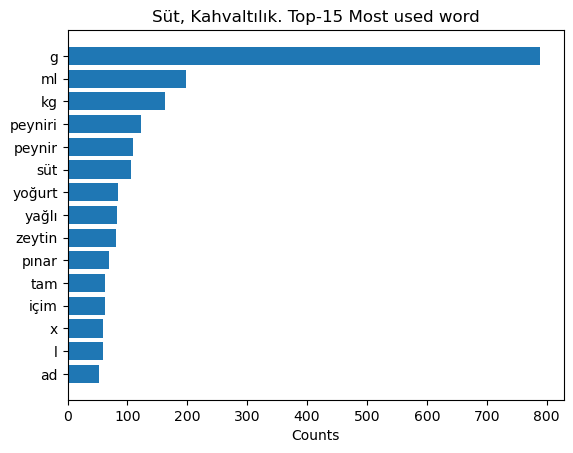

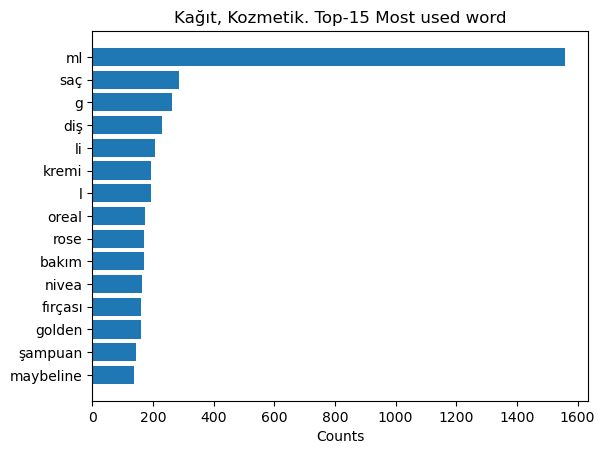

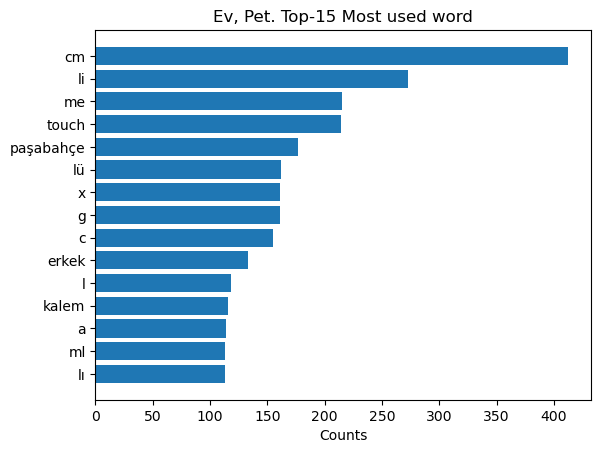

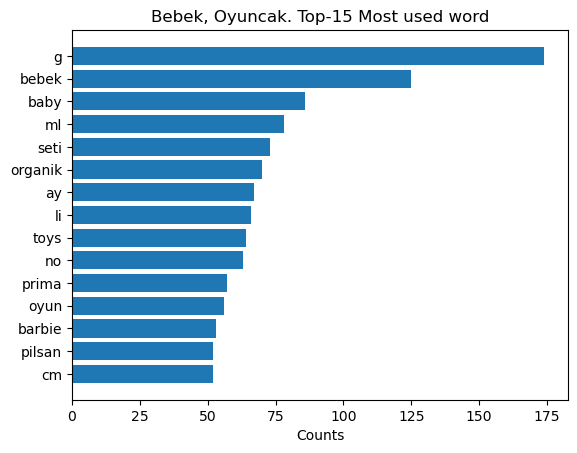

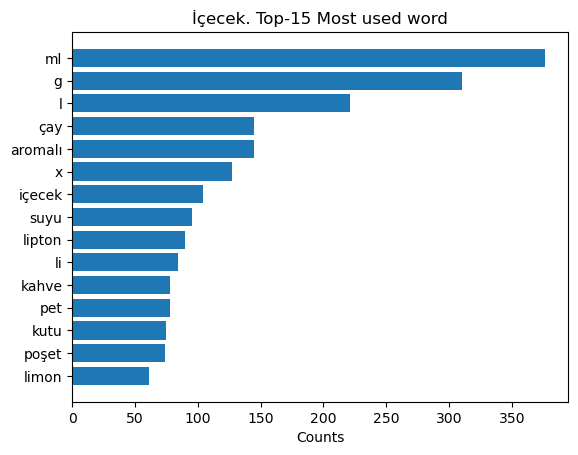

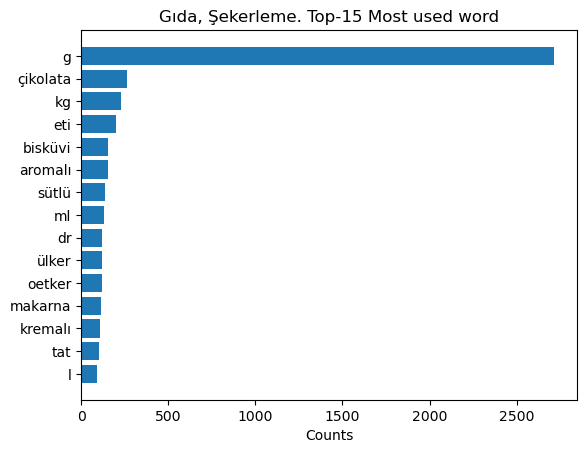

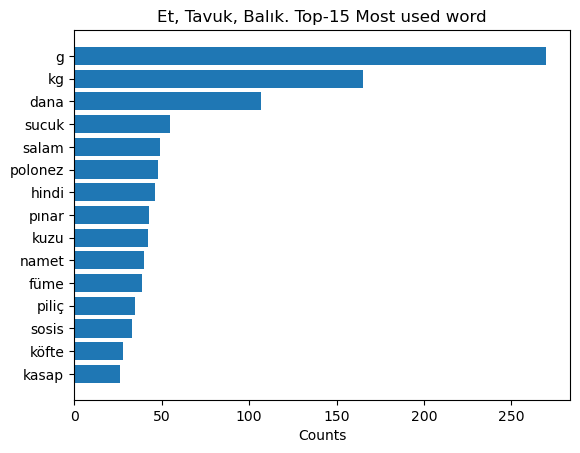

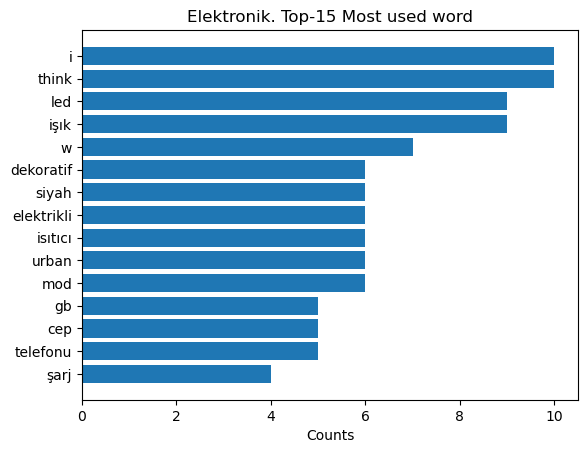

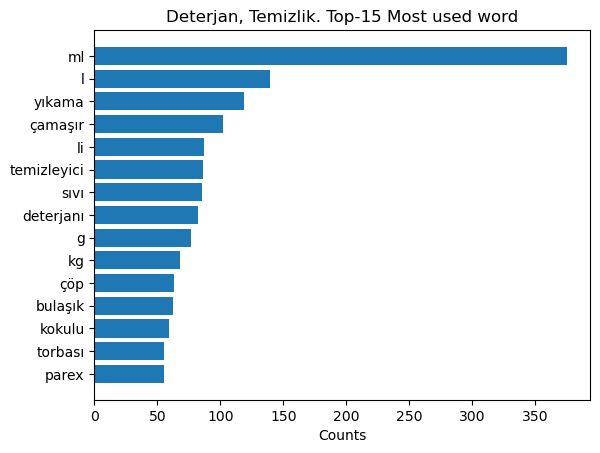

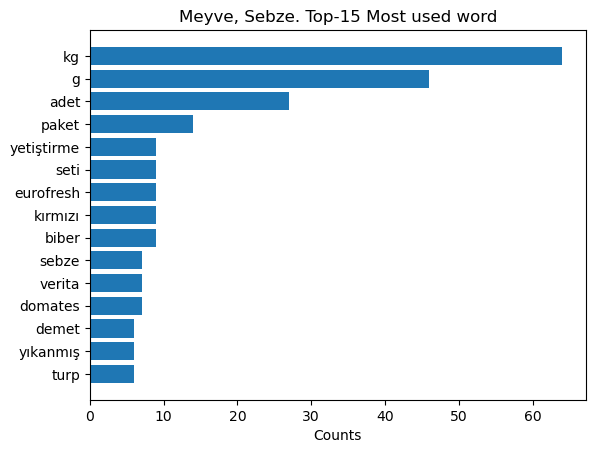

In [32]:
category_list = df['urunKategorileri'].unique().tolist()
for category in category_list:
    most_15_words(df["urunAdi"][df["urunKategorileri"]==category],category)